<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#如果直接画图，就会导致X轴糊了" data-toc-modified-id="如果直接画图，就会导致X轴糊了-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>如果直接画图，就会导致X轴糊了</a></span></li><li><span><a href="#所以要先pd.to_datetime" data-toc-modified-id="所以要先pd.to_datetime-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>所以要先pd.to_datetime</a></span><ul class="toc-item"><li><span><a href="#均匀显示坐标、日期相减" data-toc-modified-id="均匀显示坐标、日期相减-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>均匀显示坐标、日期相减</a></span></li><li><span><a href="#如果要只显示年份" data-toc-modified-id="如果要只显示年份-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>如果要只显示年份</a></span></li></ul></li></ul></div>

In [1]:
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date
import pandas as pd
import numpy as np
path = '/Users/ziyan/Documents/毕业事项/毕业论文/数据下载'
gpr = pd.read_csv(path+'/data_gpr_export.csv')
gpr.month = gpr.month.apply(lambda x:datetime.strptime(x[:-2],'%Y/%m').strftime('%Y/%m'))
gpr.isnull().sum().sort_values(ascending=False)#无空值
gpr.drop(columns=['N3H','SHARE_GPR','N10','SHARE_GPRH',
                  'GPRH_NOEW','GPR_NOEW','GPRH_AND',	
                  'GPR_AND','GPRH_BASIC','GPR_BASIC',
                  'SHAREH_CAT_1','SHAREH_CAT_2','SHAREH_CAT_3',	
                  'SHAREH_CAT_4','SHAREH_CAT_5','SHAREH_CAT_6',	
                  'SHAREH_CAT_7','SHAREH_CAT_8'],inplace=True)

gpr=gpr[(gpr['month']>='2010/01')&(gpr['month']<='2023/11')]
keep_cols = ['month','GPR','GPRT','GPRA',
             'GPRC_RUS','GPRC_AUS','GPRHC_USA',
             'GPRC_CHE','GPRC_IDN','GPRHC_ZAF',
             'GPRHC_CAN','GPRHC_ISR','GPRHC_SAU']
gpr = gpr[keep_cols]
gpr.columns  = ['mth','GPR','GPT','GPA','RUS','AUS','USA','CHE',
                'IDN','ZAF','CAN','ISR','SAU']
gpr

,mth,GPR,GPT,GPA,RUS,AUS,USA,CHE,IDN,ZAF,CAN,ISR,SAU
240,2010/01,91.58,84.97,100.41,0.34,0.04,2.81,0.02,0.04,0.00,0.10,0.37,0.22
241,2010/02,80.73,78.85,80.71,0.42,0.05,2.47,0.01,0.01,0.01,0.06,0.34,0.20
242,2010/03,74.12,73.50,70.04,0.55,0.07,2.11,0.04,0.06,0.03,0.05,0.41,0.11
243,2010/04,88.76,92.06,81.27,0.79,0.05,2.55,0.05,0.03,0.07,0.13,0.34,0.10
244,2010/05,88.96,87.49,85.86,0.56,0.06,2.94,0.04,0.03,0.02,0.13,0.40,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,2023/07,107.76,124.98,91.78,2.09,0.16,3.34,0.07,0.05,0.11,0.08,0.39,0.08
403,2023/08,105.09,123.08,85.63,2.02,0.11,2.68,0.05,0.04,0.15,0.13,0.17,0.33
404,2023/09,98.88,126.16,68.89,1.90,0.19,2.47,0.06,0.11,0.11,0.24,0.22,0.22
405,2023/10,214.78,213.22,255.36,1.77,0.19,4.91,0.02,0.06,0.02,0.25,3.53,0.87


# 如果直接画图，就会导致X轴糊了
原因是mth列是str格式，没有处理成日期

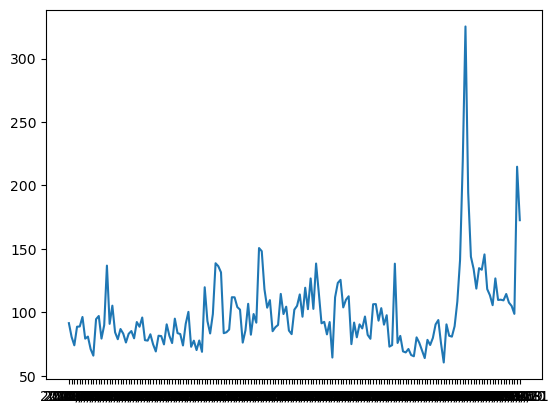

In [2]:
plt.plot(gpr['mth'],gpr['GPR'])

# 所以要先pd.to_datetime
这个函数不仅可以str转datetime，也可以datetime转datetime

In [3]:
gpr['mth'].info()
print('str->datetime')
gpr['mth'] = pd.to_datetime(gpr['mth'],format='%Y/%m')
gpr['mth'].info()
print('\n')

print('datetime->datetime')
gpr['mth'] = pd.to_datetime(gpr['mth'],format='%Y-%m')
gpr['mth'].info()

<class 'pandas.core.series.Series'>
Index: 167 entries, 240 to 406
Series name: mth
Non-Null Count  Dtype 
--------------  ----- 
167 non-null    object
dtypes: object(1)
memory usage: 2.6+ KB
str->datetime
<class 'pandas.core.series.Series'>
Index: 167 entries, 240 to 406
Series name: mth
Non-Null Count  Dtype         
--------------  -----         
167 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 2.6 KB


datetime->datetime
<class 'pandas.core.series.Series'>
Index: 167 entries, 240 to 406
Series name: mth
Non-Null Count  Dtype         
--------------  -----         
167 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 2.6 KB


## 均匀显示坐标、日期相减
gca=get current axis

In [4]:
delta = (gpr['mth'][406]-gpr['mth'][240]).days
delta

5052

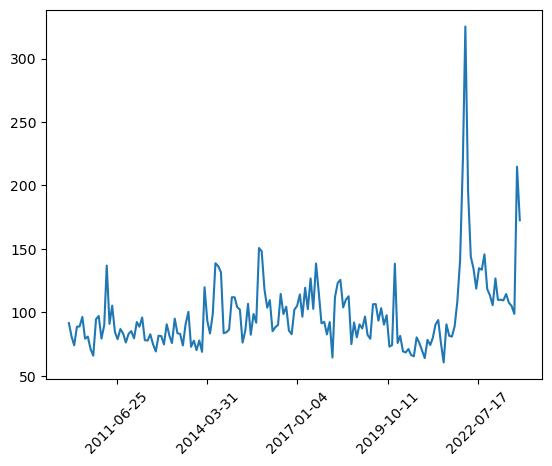

In [5]:
from matplotlib.ticker import MultipleLocator
plt.plot(gpr['mth'],gpr['GPR'])
x_major_locator = MultipleLocator(base= delta//5) #5个坐标
plt.gca().xaxis.set_major_locator(x_major_locator)
plt.xticks(rotation=45)
plt.show()

## 如果要只显示年份

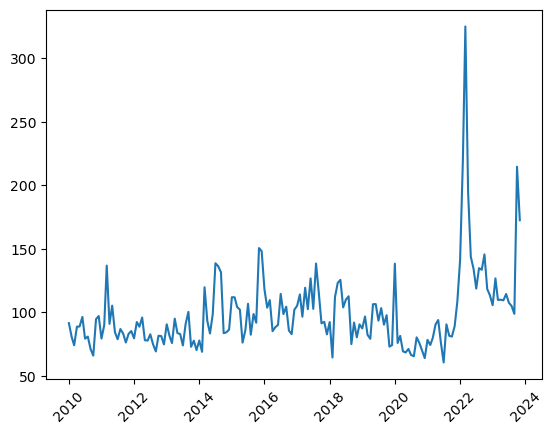

In [6]:
import matplotlib.dates as mdates
plt.plot(gpr['mth'],gpr['GPR'])
#x_major_locator = MultipleLocator(base= delta//8)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#plt.gca().xaxis.set_major_locator(x_major_locator)
plt.xticks(rotation=45)
plt.show()